<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Image-Classification-My-Model/blob/main/Fish_Image_Classification_My_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import numpy as np
from glob import glob
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential


In [12]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [13]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical') 
test_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,padding='same', strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                   # tf.keras.layers.BatchNormalization(),
                                   # tf.keras.layers.Dropout(0.4),
                                    
                                    tf.keras.layers.Conv2D(32,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # tf.keras.layers.BatchNormalization(),
                                   # tf.keras.layers.Dropout(0.4),

                                    tf.keras.layers.Conv2D(64,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # tf.keras.layers.BatchNormalization(),
                                   # tf.keras.layers.Dropout(0.4), 

                                    tf.keras.layers.Conv2D(128,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # tf.keras.layers.BatchNormalization(),
                                    #tf.keras.layers.Dropout(0.4),

                                    tf.keras.layers.Conv2D(256,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #tf.keras.layers.BatchNormalization(),
                                                                  

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.4),

                                   # tf.keras.layers.Dense(256,activation = 'relu'),
                                   # tf.keras.layers.Dropout(0.4),

                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)      

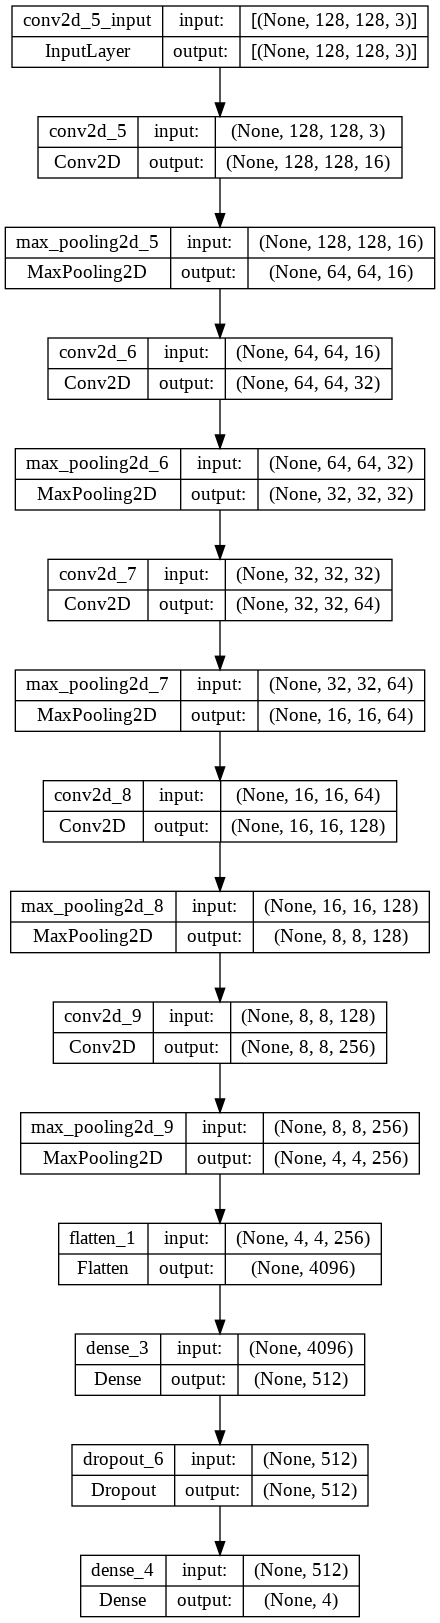

In [16]:
plot_model(model = model,show_shapes = True)

In [17]:
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy',
              #optimizer = 'Adam',
              optimizer = opt,
              metrics = ['accuracy'])

In [18]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [19]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part seven/my_model_seven.hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,factor = 0.1)

In [20]:
hist = model.fit_generator(train_fed, shuffle = True, epochs=20, validation_data=test_fed,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
                           )

<ipython-input-20-e0e9ff04e90b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_fed, shuffle = True, epochs=20, validation_data=test_fed,


Epoch 1/20
150/150 - 138s - loss: 2.2416 - accuracy: 0.5537 - val_loss: 0.6963 - val_accuracy: 0.7375 - lr: 1.0000e-04 - 138s/epoch - 919ms/step
Epoch 2/20
150/150 - 128s - loss: 0.5817 - accuracy: 0.7792 - val_loss: 0.5396 - val_accuracy: 0.7925 - lr: 1.0000e-04 - 128s/epoch - 851ms/step
Epoch 3/20
150/150 - 140s - loss: 0.4129 - accuracy: 0.8465 - val_loss: 0.4988 - val_accuracy: 0.8300 - lr: 1.0000e-04 - 140s/epoch - 932ms/step
Epoch 4/20
150/150 - 133s - loss: 0.2989 - accuracy: 0.8906 - val_loss: 0.3193 - val_accuracy: 0.8783 - lr: 1.0000e-04 - 133s/epoch - 885ms/step
Epoch 5/20
150/150 - 127s - loss: 0.2376 - accuracy: 0.9148 - val_loss: 0.2444 - val_accuracy: 0.9167 - lr: 1.0000e-04 - 127s/epoch - 845ms/step
Epoch 6/20
150/150 - 135s - loss: 0.1789 - accuracy: 0.9340 - val_loss: 0.2098 - val_accuracy: 0.9258 - lr: 1.0000e-04 - 135s/epoch - 903ms/step
Epoch 7/20
150/150 - 127s - loss: 0.1439 - accuracy: 0.9490 - val_loss: 0.2403 - val_accuracy: 0.9200 - lr: 1.0000e-04 - 127s/epoc

In [21]:
acc = model.evaluate(test_fed,steps = len(test_fed),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 13s - loss: 0.0585 - accuracy: 0.9775 - 13s/epoch - 333ms/step
97.75


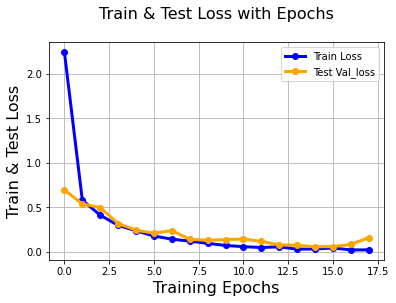

In [25]:

plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

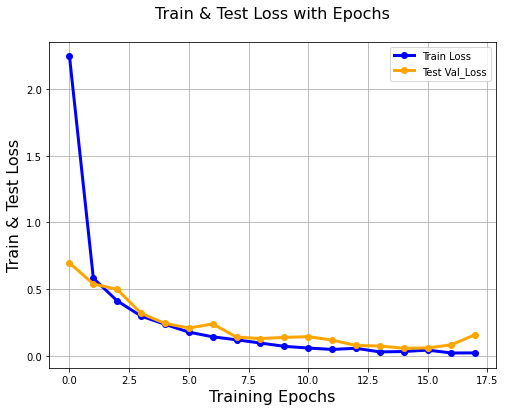

In [27]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

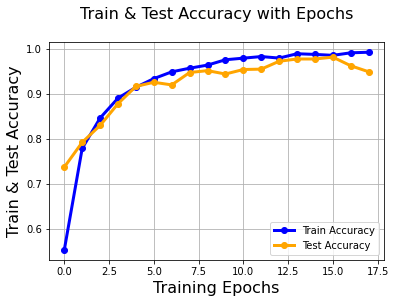

In [28]:

plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

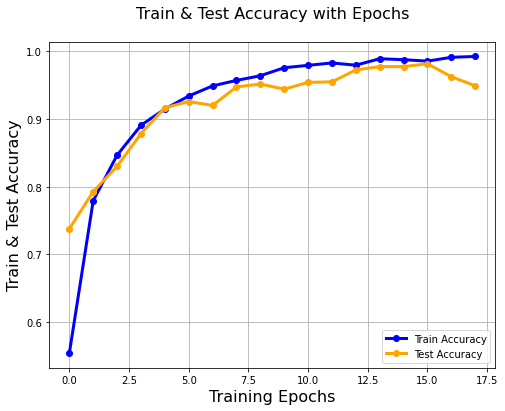

In [29]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [49]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 004.png', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')


1/1 [==============================] - 0s 25ms/step
[[1.8478881e-09 6.9642031e-10 4.0634198e-08 1.0000000e+00]]
[3, 2, 0, 1]
Tilapia_Fish : 100.0 %
Spotted_Snakehead_Fish : 0.0 %
Barbel_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [61]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Barbel_Fish/Barbel_Fish 006.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 138ms/step
[[9.9999976e-01 1.0105142e-12 2.5954037e-07 1.6929401e-10]]
[0, 2, 3, 1]
Barbel_Fish : 100.0 %
Spotted_Snakehead_Fish : 0.0 %
Tilapia_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [60]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Spotted_Snakehead_Fish/Spotted_Fish 005.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 26ms/step
[[6.8479507e-09 9.2218454e-18 1.0000000e+00 2.2621360e-14]]
[2, 0, 3, 1]
Spotted_Snakehead_Fish : 100.0 %
Barbel_Fish : 0.0 %
Tilapia_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [66]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Hilsha_Fish/Hilsha_Fish 049.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 27ms/step
[[7.2441759e-07 9.9944288e-01 3.2820145e-07 5.5599946e-04]]
[1, 3, 0, 2]
Hilsha_Fish : 99.94 %
Tilapia_Fish : 0.06 %
Barbel_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
